# Virgo Demo 3 - Advanced pipeline

In [33]:
from virgo.cluster import VirgoCluster
from virgo.kernel import VirgoKernel, VirgoSimpleKernel
from virgo.mixture import VirgoMixture, VirgoClustering
from virgo.cleaner import LowDensityCleaner

%load_ext autoreload
%autoreload 2

%matplotlib notebook

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Reading  1284602  particles
Data set 0 - Shape: (156080, 8)
Mean / Std: 81114.128 / 250502.824
Min / Max: -19939.822 / 1284546.000
Data set 1 - Shape: (156080, 7)
Mean / Std: -0.000 / 1.000
Min / Max: -4.932 / 5.677


<IPython.core.display.Javascript object>


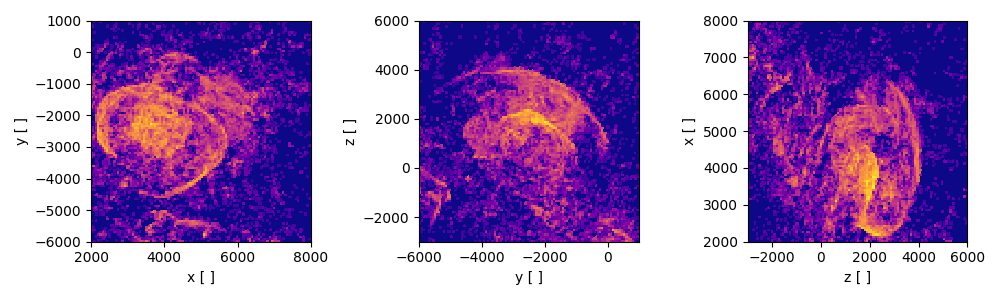

In [37]:
filebase = "/home/max/Software/virgo/data/VIRGO/snap_800"
virgo_cluster = VirgoCluster(
    file_name=filebase, io_mode=1, cut_mach_dim=-2, n_max_data=200000, 
)
virgo_cluster.data = virgo_cluster.data[:, :-1]
virgo_cluster.scale_data()
virgo_cluster.print_datastats()
virgo_cluster.plot_raw_hists(
    bins=100, plot_range=[[2000., 8000.], [-6000., 1000.], [-3000., 6000.]]
)

Found  1  groups
[0] [156080]


<IPython.core.display.Javascript object>


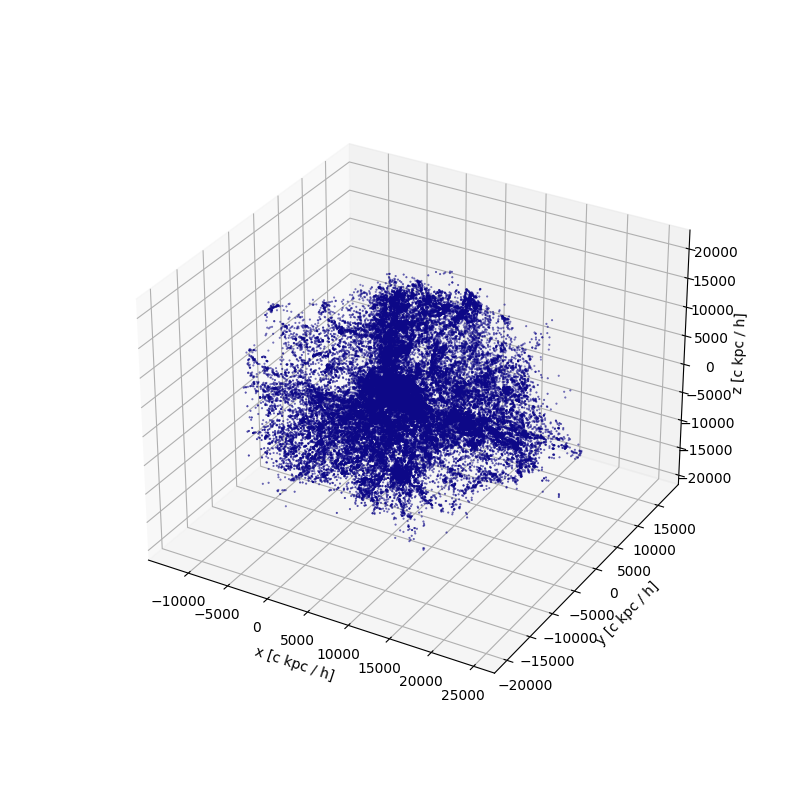

In [50]:
# Vanilla FoF
virgo_cluster.run_fof(linking_length=5000., min_group_size=1000, use_scaled_data=False)

labels, counts = virgo_cluster.get_labels(return_counts=True)
print(labels, counts)
virgo_cluster.plot_cluster(n_step=1, store_gif=False, gif_title="fof_vanilla_50", maker_size=1.)

In [38]:
# virgo_kernel = VirgoKernel(virgo_cluster, spatial_dim=[0, 1, 2, 3, 4, 5], k_nystroem=4000, pca_comp=5)
virgo_kernel = VirgoKernel(virgo_cluster, k_nystroem=100, pca_comp=5)
virgo_kernel()
virgo_cluster.print_datastats()

Data set 0 - Shape: (156080, 8)
Mean / Std: 81114.128 / 250502.824
Min / Max: -19939.822 / 1284546.000
Data set 1 - Shape: (156080, 5)
Mean / Std: 0.000 / 0.240
Min / Max: -0.521 / 0.862


/home/max/Software/virgo/virgo/fof/run_fof.py:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  groups = np.array(pyfof.friends_of_friends(pos, linking_length))


Found  10311  groups
67
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46
 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65] [32970 65187 37045  1716   989   854   831   800   684   666   555   547
   520   514   509   500   486   461   437   421   391   384   366   357
   336   322   306   290   267   264   262   256   255   253   251   243
   235   226   225   209   205   194   184   184   169   167   165   151
   142   139   139   133   126   126   124   120   118   115   115   115
   115   114   113   111   105   101   100]


<IPython.core.display.Javascript object>


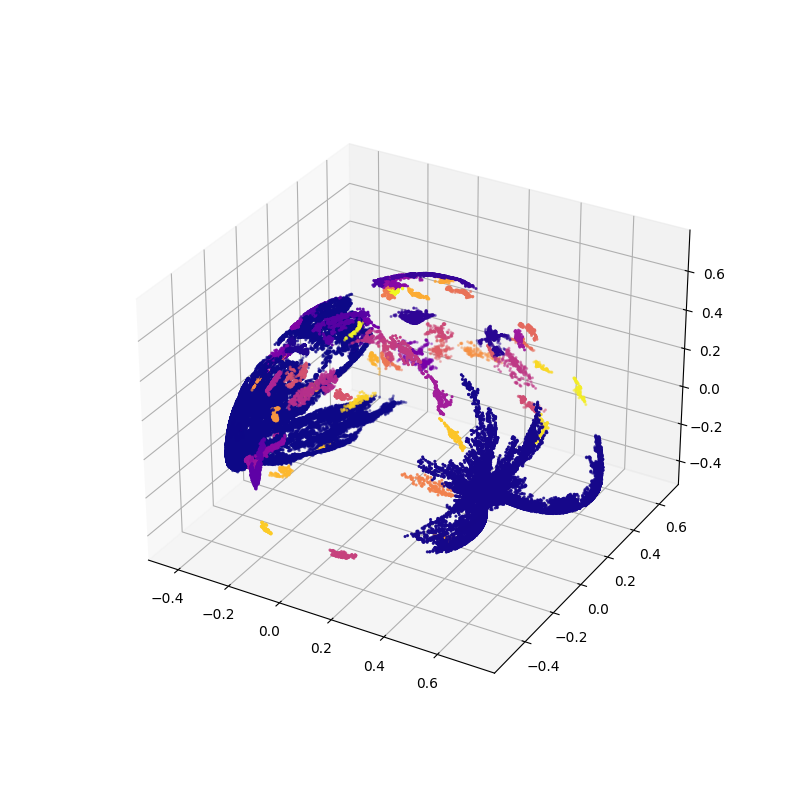

<IPython.core.display.Javascript object>


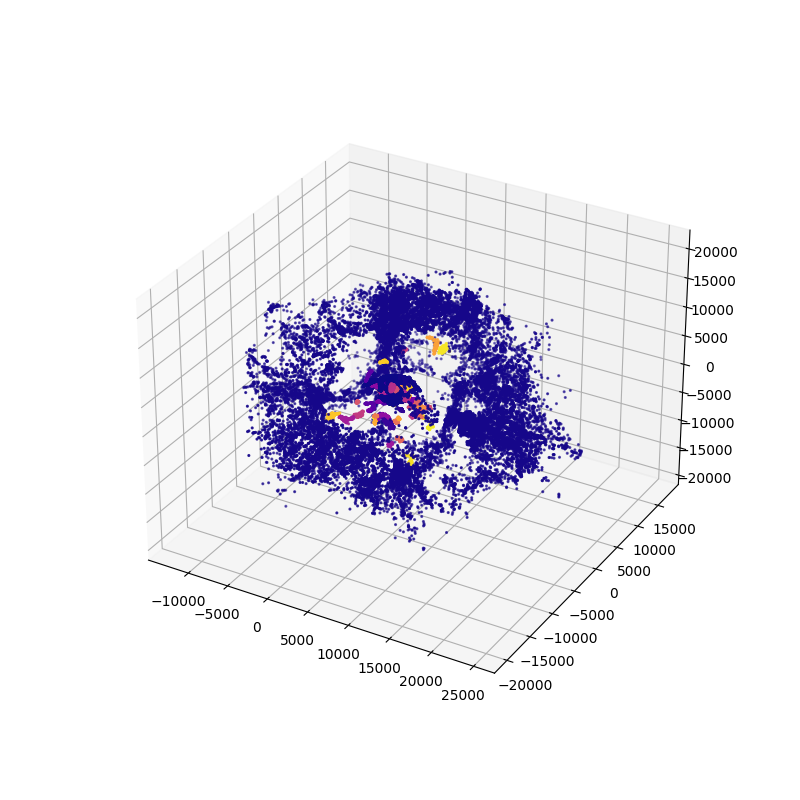

In [10]:
# rbf 800
virgo_cluster.run_fof(linking_length=0.018, min_group_size=100, use_scaled_data=True)

# # rbf 850
# virgo_cluster.run_fof(linking_length=0.019, min_group_size=300, use_scaled_data=True)

# # rbf 900
# virgo_cluster.run_fof(linking_length=0.019, min_group_size=300, use_scaled_data=True)

# raw
# virgo_cluster.run_fof(linking_length=30., min_group_size=3000, use_scaled_data=False)

labels, counts = virgo_cluster.get_labels(return_counts=True)
print(len(labels))
print(labels, counts)
virgo_cluster.plot_cluster(n_step=1, plot_kernel_space=True, store_gif=False, gif_title="fof_kernel_kspace")
virgo_cluster.plot_cluster(n_step=1, store_gif=False, gif_title="fof_kernel")

Cluster -1
Cluster 0
Density: 5.852758531337735e-09
Cluster 1
Density: 6.080741083639727e-12
Cluster 2
Density: 1.2127473963297429e-07
Cluster 3
Density: 7.297434924562026e-09
Cluster 4
Density: 7.678862637290446e-08
Cluster 5
Density: 2.0419197608942553e-08
Cluster 6
Density: 1.758781078115455e-07
Cluster 7
Density: 1.2366576042521282e-08
Cluster 8
Density: 3.309263496234307e-08
Cluster 9
Density: 5.018420300346145e-09
Cluster 10
Density: 2.878838307217403e-09
Cluster 11
Density: 1.2005019332526158e-07
Cluster 12
Density: 5.469675771596822e-07
Cluster 13
Density: 6.806322187326773e-07
Cluster 14
Density: 6.008161862744536e-07
Cluster 15
Density: 1.736661213514577e-08
Cluster 16
Density: 1.98564453515588e-07
Cluster 17
Density: 1.610111324612545e-07
Cluster 18
Density: 8.296211677372211e-08
Cluster 19
Density: 7.717784328850344e-07
Cluster 20
Density: 5.284329498006426e-09
Cluster 21
Density: 2.916921986718331e-06
Cluster 22
Density: 3.1979423238492903e-08
Cluster 23
Density: 1.4401469

/home/max/Software/virgo/virgo/cleaner.py:41: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.clusters = np.array(self.clusters)
/home/max/Software/virgo/virgo/cleaner.py:42: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.labels = np.array(self.labels)


<IPython.core.display.Javascript object>


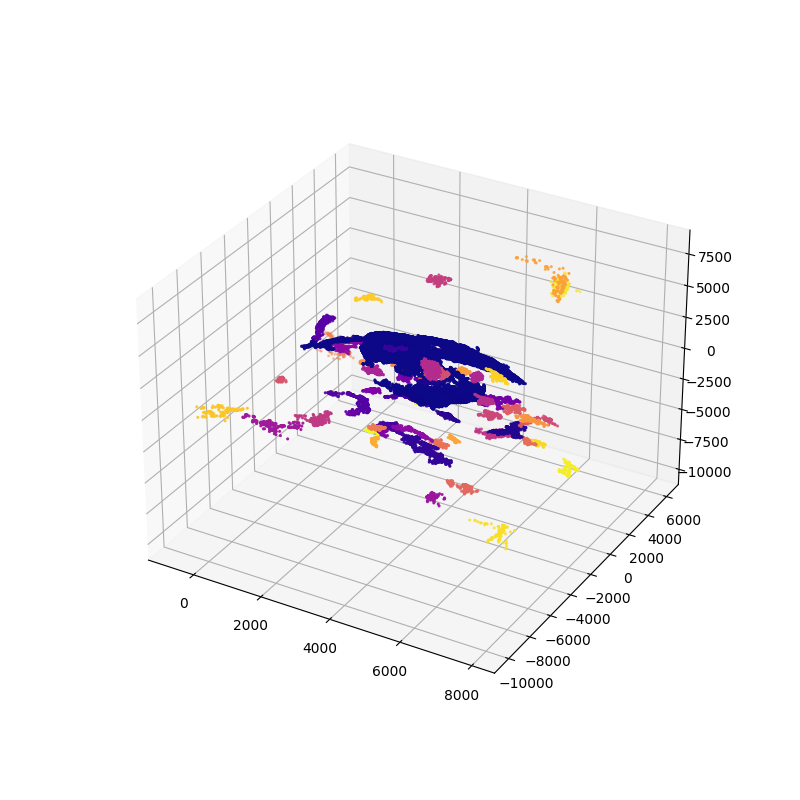

In [11]:
# 800 -16
# 850 -14
# 900 -14
d_cleaner = LowDensityCleaner(virgo_cluster, 1e-10)
d_cleaner.clean()
print(virgo_cluster.get_labels(return_counts=True))
virgo_cluster.plot_cluster(n_step=1)

<IPython.core.display.Javascript object>


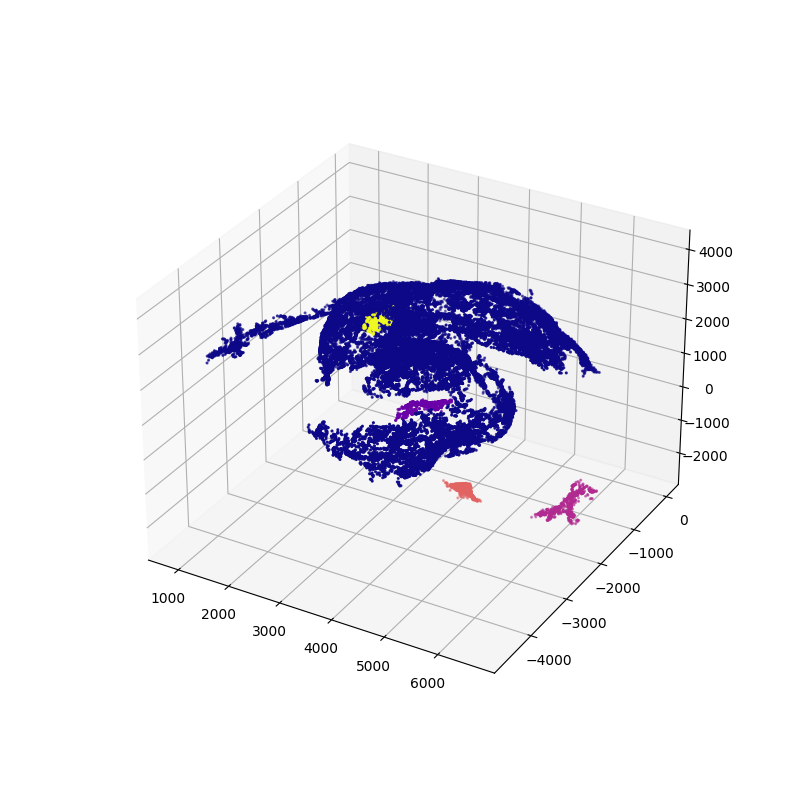

In [12]:
virgo_cluster.plot_cluster(n_step=1, store_gif=False, gif_title="fof_kernel", cluster_label=[0, 1, 2, 3, 5])

ELBO: 3.3968235115869434
Mixture weights [0.52439125 0.47560875]
(array([0, 1]), array([81867, 74213]))


<IPython.core.display.Javascript object>


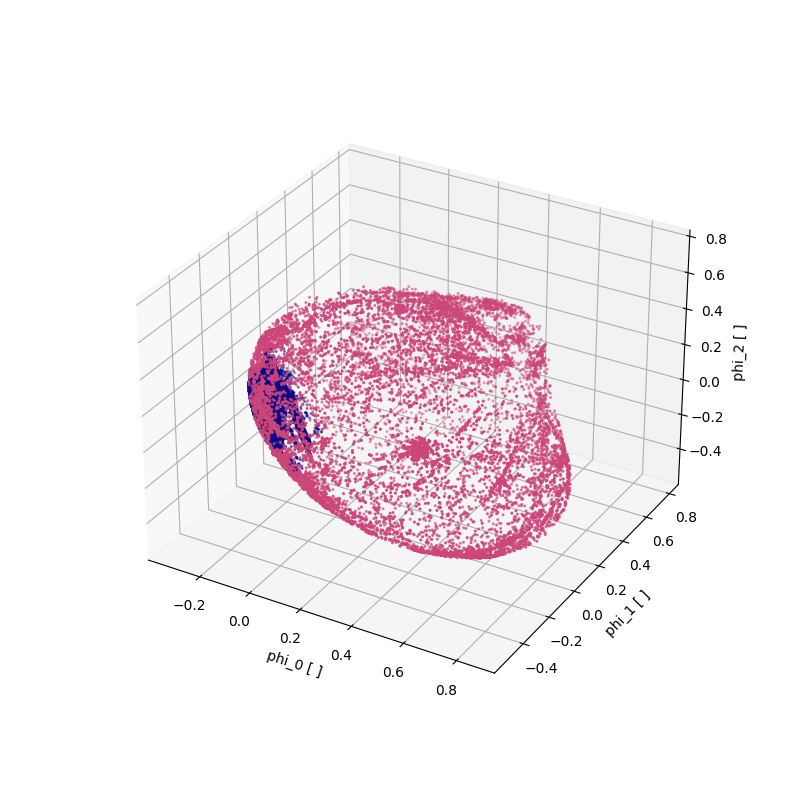

<IPython.core.display.Javascript object>


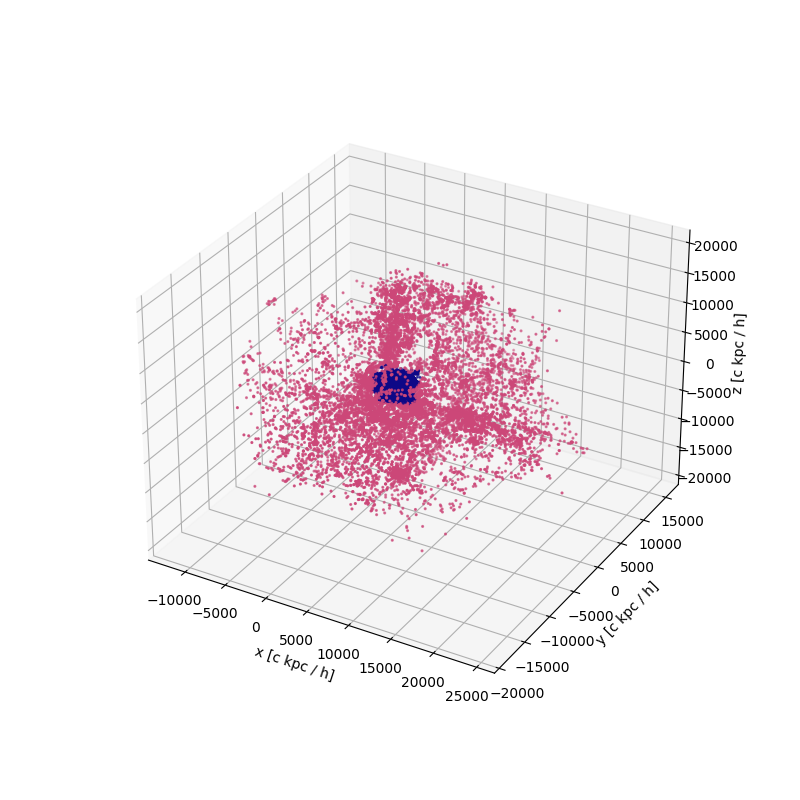

In [42]:
virgo_mixture = VirgoMixture(virgo_cluster, n_comp=2)
elbo = virgo_mixture.fit()

print(f"ELBO: {elbo}")
print(f"Mixture weights {virgo_mixture.model.weights_}")

virgo_mixture.predict(remove_uncertain_labels=False)
labels_removed = virgo_cluster.get_labels(return_counts=True)
print(labels_removed)

virgo_cluster.cluster_labels[virgo_cluster.cluster_labels == 1] = 2
# virgo_cluster.cluster_labels[virgo_cluster.cluster_labels == 1][0:100] = 4

virgo_cluster.plot_cluster(cmap_vmax=4, n_step=5, plot_kernel_space=True, store_gif=False, gif_title="nystroem_separation_kernelspace")
virgo_cluster.plot_cluster(cmap_vmax=4, n_step=5, store_gif=False, gif_title="nystroem_separation_kernelspace")

Cluster -1
Cluster 0
Density: 4.126267090643052e-09
(array([-1,  0]), array([74213, 81867]))


<IPython.core.display.Javascript object>


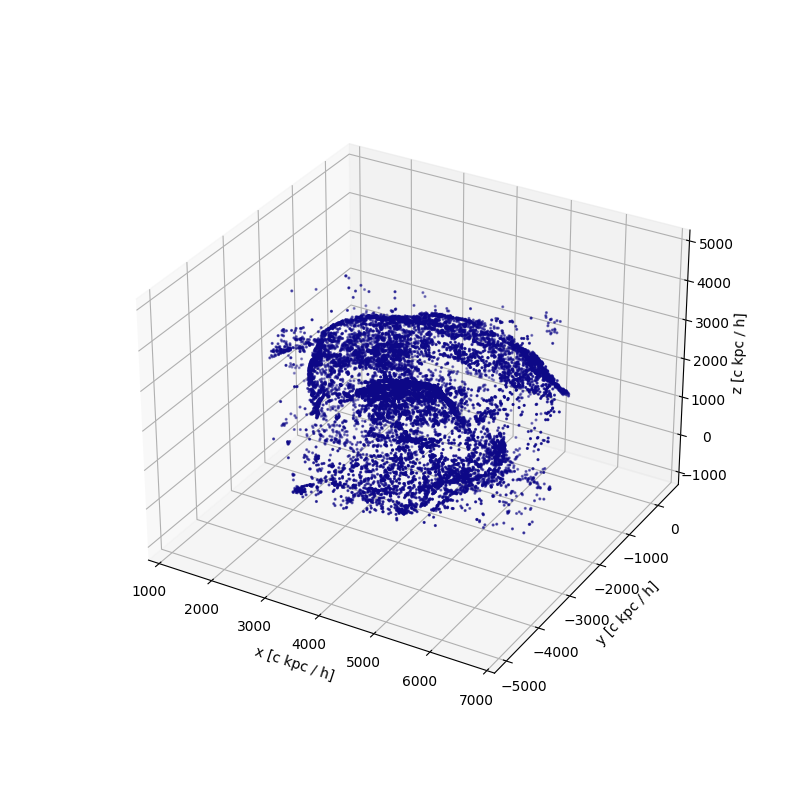

In [44]:
d_cleaner = LowDensityCleaner(virgo_cluster, 1e-10)
d_cleaner.clean()
print(virgo_cluster.get_labels(return_counts=True))
virgo_cluster.plot_cluster(n_step=5)

In [17]:
vc_2 = VirgoCluster(file_name=None)
vc_2.data = virgo_cluster.cluster[virgo_cluster.cluster_labels >=0]
vc_2.scale_data()
vc_2.print_datastats()

Data set 0 - Shape: (85110, 8)
Mean / Std: 81020.479 / 249973.529
Min / Max: -5885.738 / 1284295.000
Data set 1 - Shape: (85110, 7)
Mean / Std: 0.000 / 1.000
Min / Max: -3.888 / 12.577


Found  1  groups
1
[0] [85110]
0


<IPython.core.display.Javascript object>


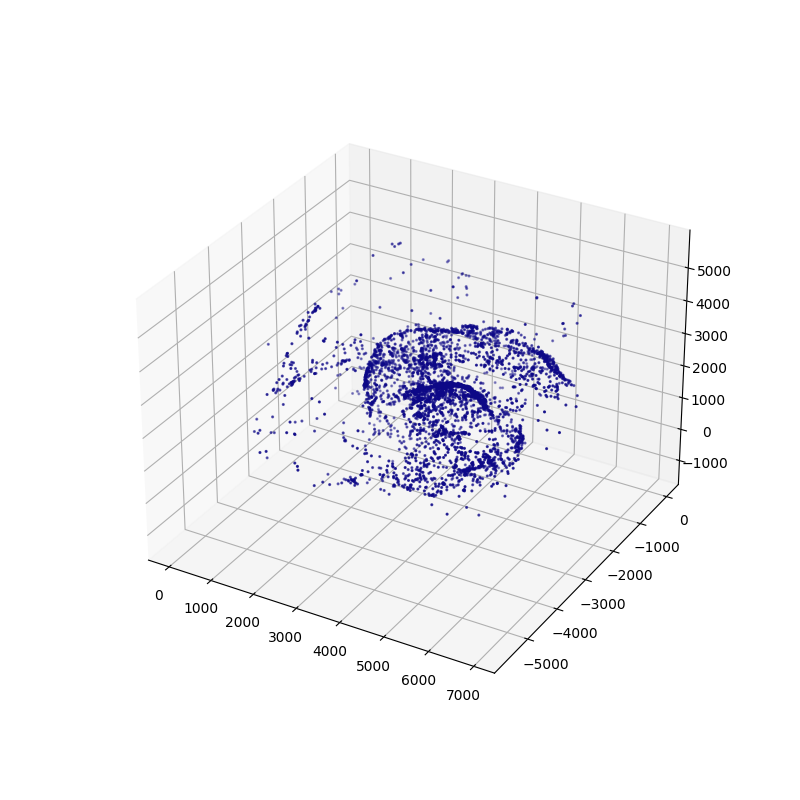

In [18]:
vc_2.run_fof(linking_length=10000., min_group_size=200, use_scaled_data=False)


labels, counts = vc_2.get_labels(return_counts=True)
print(len(labels))
print(labels, counts)
print(counts[1:].sum())
vc_2.plot_cluster(n_step=20, store_gif=False, gif_title="fof_kernel")

In [19]:
vc_3 = VirgoCluster(file_name=None)
vc_3.data = vc_2.cluster[vc_2.cluster_labels >=0]
vc_3.scale_data()
vc_3.print_datastats()

Data set 0 - Shape: (85110, 8)
Mean / Std: 81020.479 / 249973.529
Min / Max: -5885.738 / 1284295.000
Data set 1 - Shape: (85110, 7)
Mean / Std: 0.000 / 1.000
Min / Max: -3.888 / 12.577


(85110, 1000)
(85110, 1000)
Data set 0 - Shape: (85110, 8)
Mean / Std: 81020.479 / 249973.529
Min / Max: -5885.738 / 1284295.000
Data set 1 - Shape: (85110, 5)
Mean / Std: -0.000 / 0.283
Min / Max: -0.634 / 0.668
ELBO: 0.1861178537250761
Mixture weights [0.61096829 0.38903171]
(array([0, 1]), array([51932, 33178]))


<IPython.core.display.Javascript object>


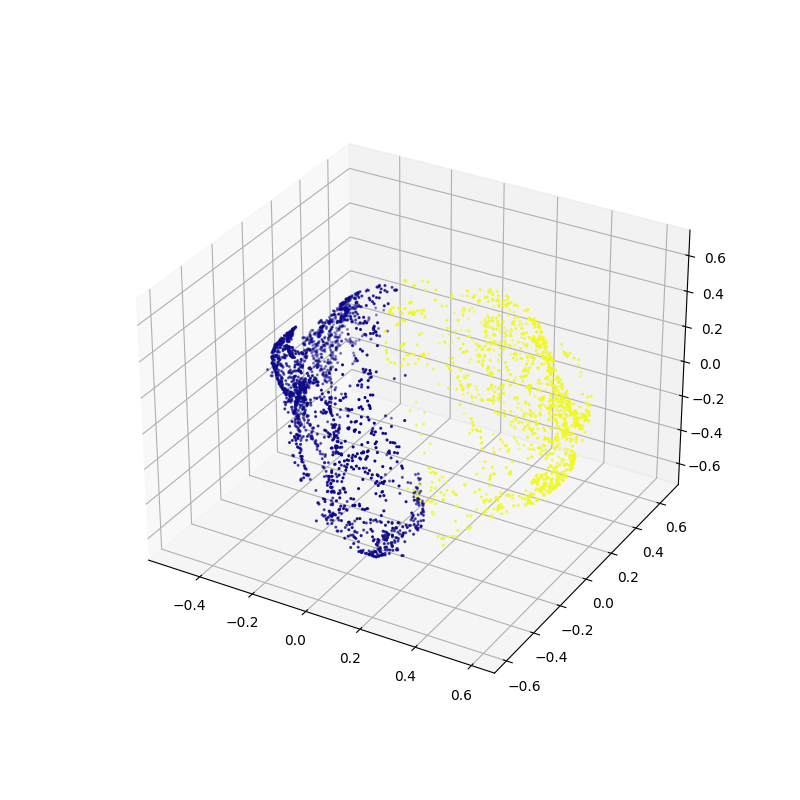

<IPython.core.display.Javascript object>


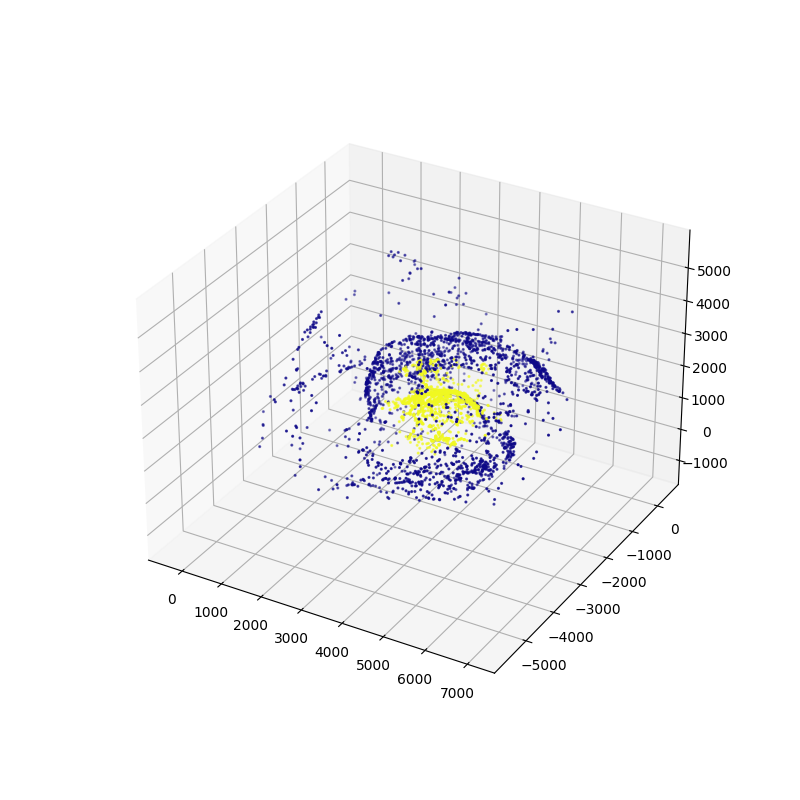

In [20]:
vk_3 = VirgoKernel(vc_3, k_nystroem=1000, pca_comp=5)
vk_3()
vc_3.print_datastats()

virgo_mixture = VirgoMixture(vc_3, n_comp=2)
elbo = virgo_mixture.fit()

print(f"ELBO: {elbo}")
print(f"Mixture weights {virgo_mixture.model.weights_}")

virgo_mixture.predict(remove_uncertain_labels=False)
labels_removed = vc_3.get_labels(return_counts=True)
print(labels_removed)

vc_3.plot_cluster(n_step=25, plot_kernel_space=True, store_gif=False, gif_title="gmm_kernel_kspace")
vc_3.plot_cluster(n_step=25, store_gif=False, gif_title="gmm_kernel")


# vk_3 = VirgoSimpleKernel(vc_3)
# vk_3()
# vc_3.print_datastats()

# virgo_mixture = VirgoMixture(vc_3, n_comp=4)
# elbo = virgo_mixture.fit()

# print(f"ELBO: {elbo}")
# print(f"Mixture weights {virgo_mixture.model.weights_}")

# virgo_mixture.predict(remove_uncertain_labels=True)
# labels_removed = vc_3.get_labels(return_counts=True)
# print(labels_removed)

# vc_3.plot_cluster(n_step=5, plot_kernel_space=True, store_gif=False, gif_title="gmm_kernel_kspace")
# vc_3.plot_cluster(n_step=5, store_gif=False, gif_title="gmm_kernel")

Cluster -1
Cluster 0
Density: 2.34421160175957e-07
Cluster 1
Density: 1.1117020376995028e-08
Cluster 2
Density: 4.793434284005362e-10
Cluster 3
Density: 1.6603195986036376e-07
(array([-1,  0]), array([70970, 85110]))


<IPython.core.display.Javascript object>


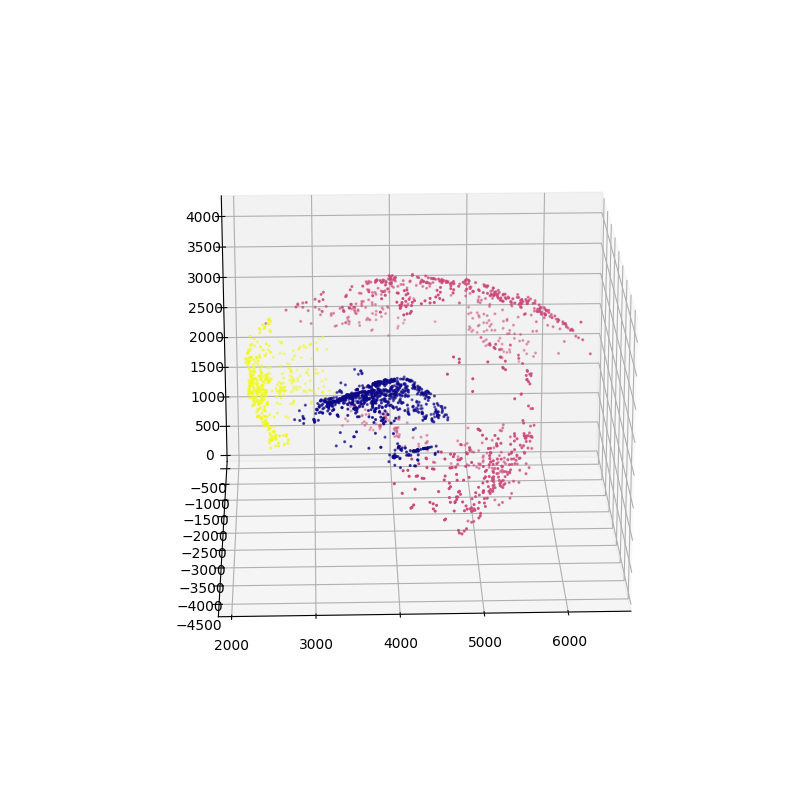

In [42]:
d_cleaner = LowDensityCleaner(vc_3, 1e-8)
d_cleaner.clean()
print(virgo_cluster.get_labels(return_counts=True))
vc_3.plot_cluster(n_step=25)

In [21]:
vc_4 = VirgoCluster(file_name=None)
vc_4.data = vc_3.cluster[vc_3.cluster_labels >=0]
vc_4.scale_data()
vc_4.print_datastats()

Data set 0 - Shape: (85110, 8)
Mean / Std: 81020.479 / 249973.529
Min / Max: -5885.738 / 1284295.000
Data set 1 - Shape: (85110, 7)
Mean / Std: 0.000 / 1.000
Min / Max: -3.888 / 12.577


Data set 0 - Shape: (85110, 8)
Mean / Std: 81020.479 / 249973.529
Min / Max: -5885.738 / 1284295.000
Data set 1 - Shape: (85110, 8)
Mean / Std: 2.599 / 9.681
Min / Max: -3.888 / 139.843
ELBO: -8.898237746770029
Mixture weights [0.11926384 0.23724521 0.1816853  0.11911972 0.18269856 0.15998738]
Removed 6667
(array([-1,  0,  1,  2,  3,  4,  5]), array([ 6667, 19132, 13810, 13269, 13089,  9694,  9449]))


<IPython.core.display.Javascript object>


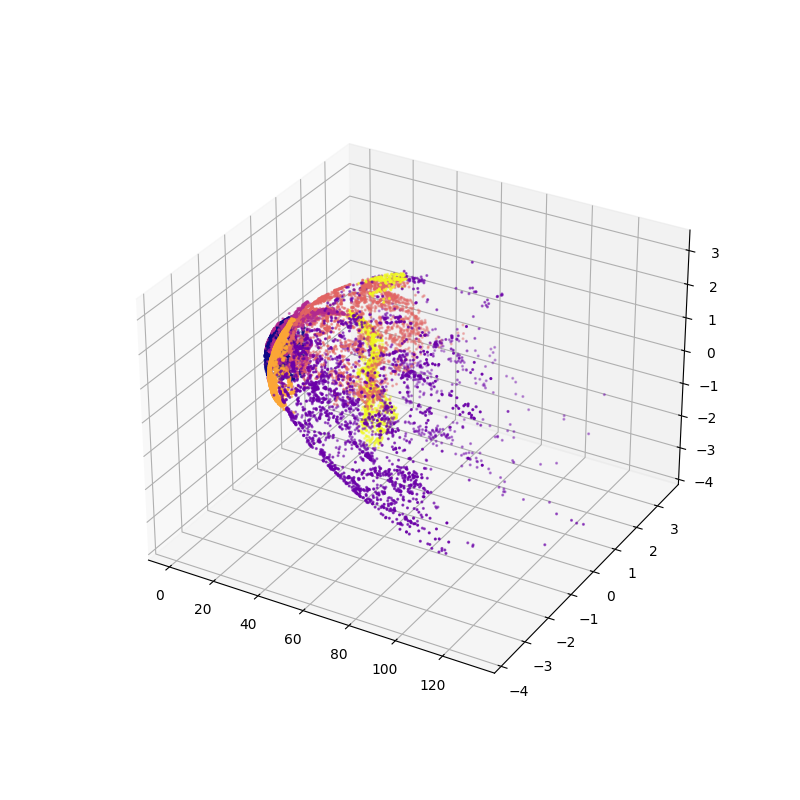

<IPython.core.display.Javascript object>


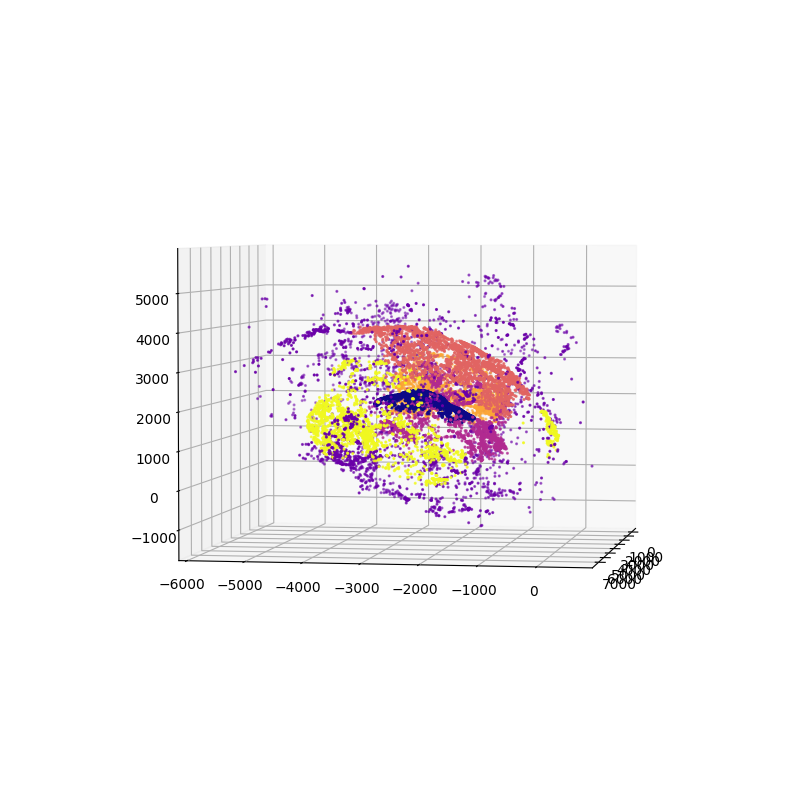

In [22]:
vk_4 = VirgoSimpleKernel(vc_4)
vk_4()
vc_4.print_datastats()

virgo_mixture = VirgoMixture(vc_4, n_comp=6)
elbo = virgo_mixture.fit()

print(f"ELBO: {elbo}")
print(f"Mixture weights {virgo_mixture.model.weights_}")

virgo_mixture.predict(remove_uncertain_labels=True)
labels_removed = vc_4.get_labels(return_counts=True)
print(labels_removed)

vc_4.plot_cluster(n_step=5, plot_kernel_space=True, store_gif=False, gif_title="gmm_kernel_kspace")
vc_4.plot_cluster(n_step=5, store_gif=False, gif_title="gmm_kernel")

In [ ]:
vk_4 = VirgoKernel(vc_4, k_nystroem=4000, pca_comp=5)
vk_4()
vc_4.print_datastats()

virgo_mixture = VirgoMixture(vc_4, n_comp=8)
elbo = virgo_mixture.fit()

print(f"ELBO: {elbo}")
print(f"Mixture weights {virgo_mixture.model.weights_}")

virgo_mixture.predict(remove_uncertain_labels=True)
labels_removed = vc_4.get_labels(return_counts=True)
print(labels_removed)

vc_4.plot_cluster(n_step=5, plot_kernel_space=True, store_gif=False, gif_title="gmm_kernel_kspace")
vc_4.plot_cluster(n_step=5, store_gif=False, gif_title="gmm_kernel")

(85110, 4000)
(85110, 4000)


Found  1922  groups
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46
 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64] [4913 9748 4102 2090 1888 1221  717  389  249  186  181  176  166  165
  142  139  139  115  115  114  110   95   90   69   68   68   67   63
   59   58   54   53   50   49   49   48   48   45   44   43   41   41
   39   39   39   39   38   38   37   36   36   33   33   32   30   29
   29   28   27   27   26   26   25   25   25   25]
24115


/home/max/Software/virgo/virgo/fof/run_fof.py:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  groups = np.array(pyfof.friends_of_friends(pos, linking_length))


<IPython.core.display.Javascript object>


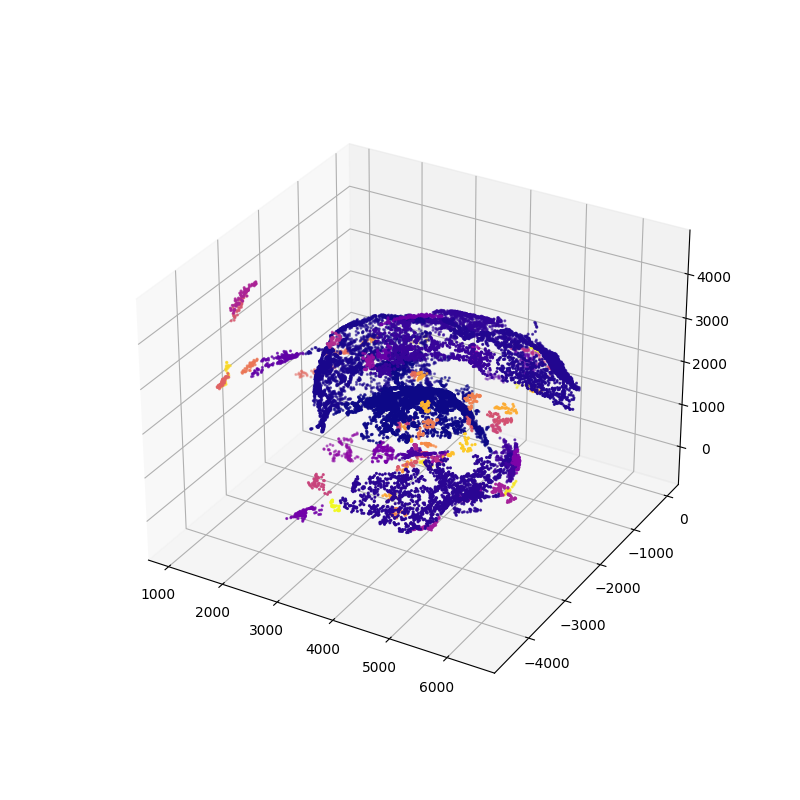

In [13]:
vc_2.run_fof(linking_length=80., min_group_size=25, use_scaled_data=False)

labels, counts = vc_2.get_labels(return_counts=True)
print(labels, counts)
print(counts[1:].sum())
# vc_2.plot_cluster(n_step=1, plot_kernel_space=True, store_gif=False, gif_title="fof_kernel_kspace")
vc_2.plot_cluster(n_step=1, store_gif=False, gif_title="fof_kernel")

In [14]:
vc_3 = VirgoCluster(file_name=None)
vc_3.data = vc_2.cluster[vc_2.cluster_labels >=0]
vc_3.scale_data(use_dim=[0, 1, 2])
vc_3.print_datastats()

Data set 0 - Shape: (24115, 9)
Mean / Std: 73090.827 / 239244.931
Min / Max: -4571.936 / 1284158.000
Data set 1 - Shape: (24115, 3)
Mean / Std: 0.000 / 1.000
Min / Max: -3.362 / 3.213


In [15]:
vk_3 = VirgoKernel(vc_3, k_nystroem=4000, pca_comp=5)
vk_3()
vc_3.print_datastats()

Data set 0 - Shape: (24115, 9)
Mean / Std: 73090.827 / 239244.931
Min / Max: -4571.936 / 1284158.000
Data set 1 - Shape: (24115, 5)
Mean / Std: 0.000 / 0.287
Min / Max: -0.632 / 0.691


Found  1240  groups
11
[-1  0  1  2  3  4  5  6  7  8  9] [10073  8385  2773   651   569   357   290   284   267   237   229]


<IPython.core.display.Javascript object>


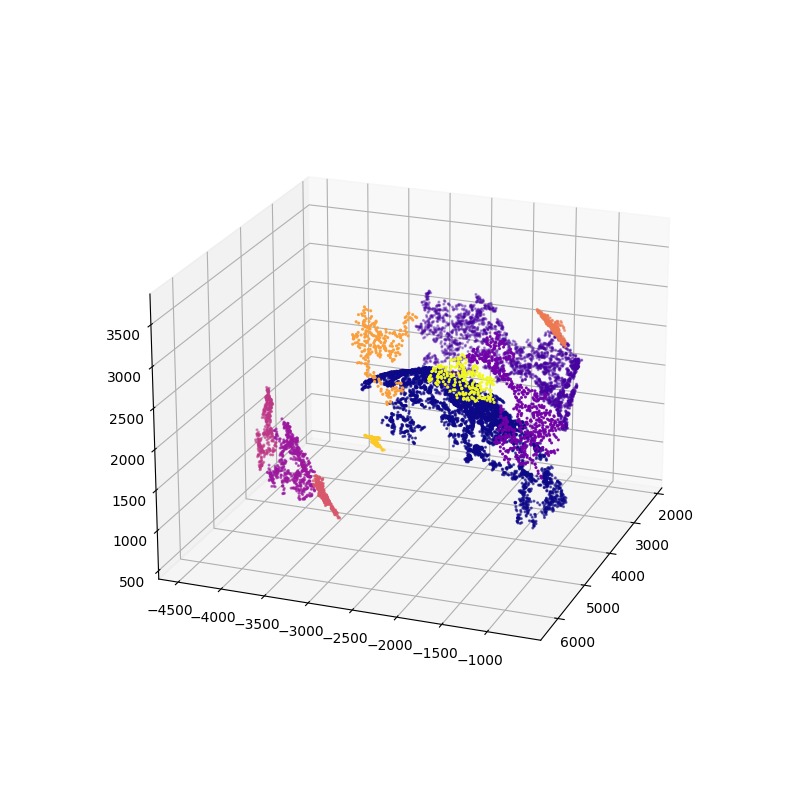

In [42]:
# rbf 800
vc_3.run_fof(linking_length=50., min_group_size=200, use_scaled_data=False)

labels, counts = vc_3.get_labels(return_counts=True)
print(len(labels))
print(labels, counts)
vc_3.plot_cluster(n_step=1, store_gif=False, gif_title="fof_kernel")

Found  298  groups
10
[-1  0  1  2  3  4  5  6  7  8] [4266 8770 3701 2807 2070 1318  349  313  274  247]


/home/max/Software/virgo/virgo/fof/run_fof.py:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  groups = np.array(pyfof.friends_of_friends(pos, linking_length))


<IPython.core.display.Javascript object>


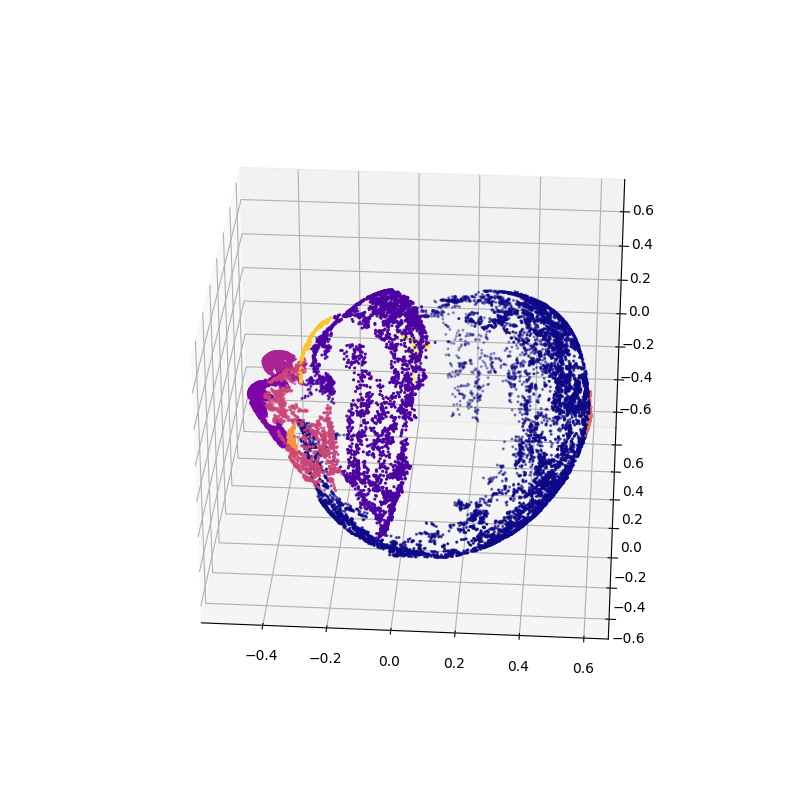

<IPython.core.display.Javascript object>


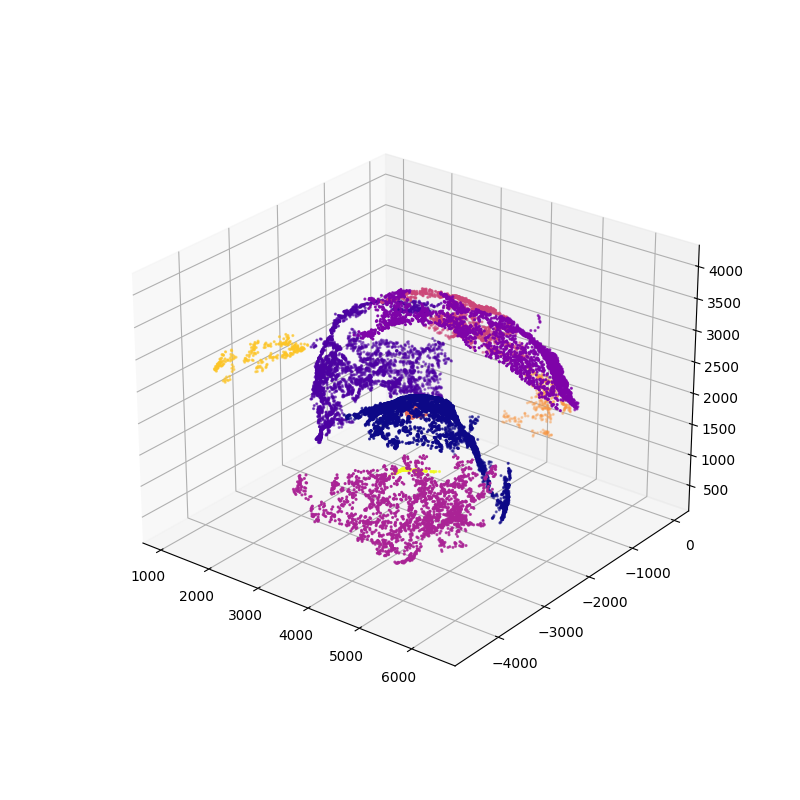

In [16]:
# rbf 800
vc_3.run_fof(linking_length=0.036, min_group_size=200, use_scaled_data=True)

labels, counts = vc_3.get_labels(return_counts=True)
print(len(labels))
print(labels, counts)
vc_3.plot_cluster(n_step=1, plot_kernel_space=True, store_gif=False, gif_title="fof_kernel_kspace")
vc_3.plot_cluster(n_step=1, store_gif=False, gif_title="fof_kernel")

ELBO: 3.125042826912772
Mixture weights [0.24702195 0.15363287 0.14768221 0.17230724 0.12376586 0.15558987]
Removed 1887
(array([-1,  0,  1,  2,  3,  4,  5]), array([1887, 5577, 4069, 3596, 3301, 3050, 2635]))


<IPython.core.display.Javascript object>


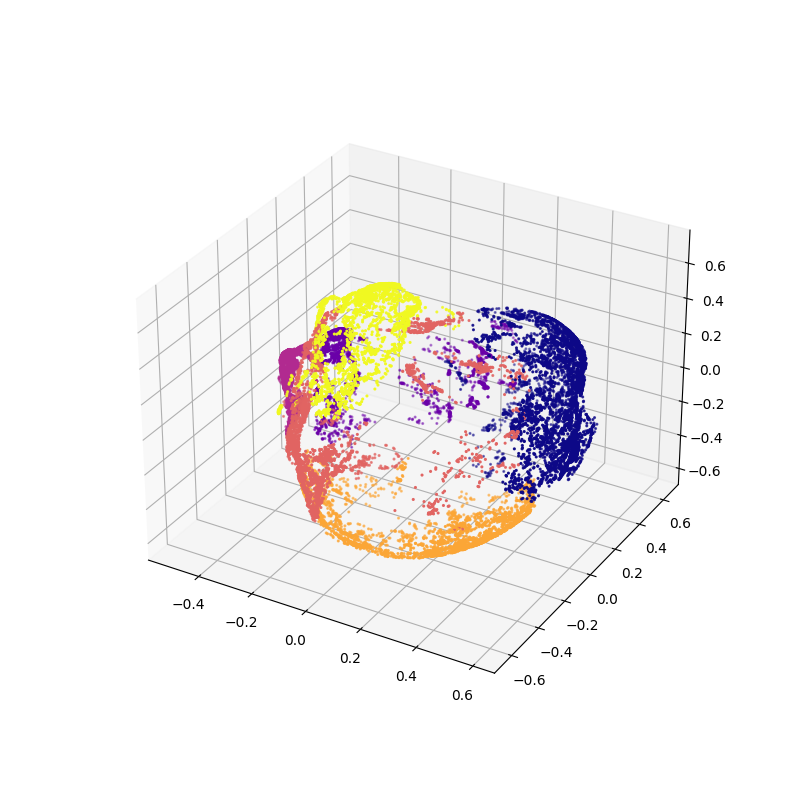

<IPython.core.display.Javascript object>


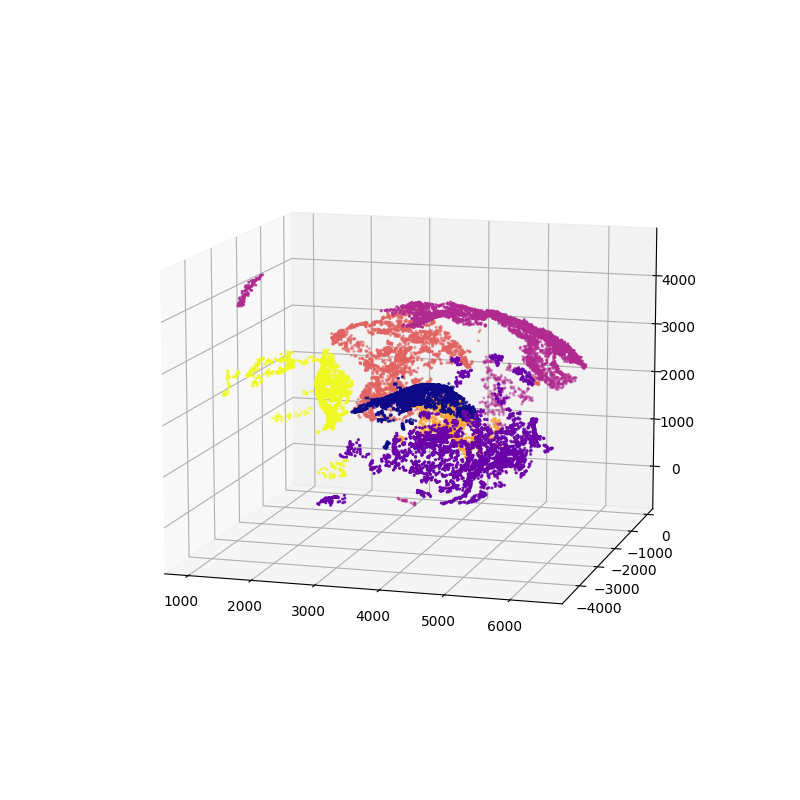

In [17]:
virgo_mixture = VirgoMixture(vc_3, n_comp=6)
elbo = virgo_mixture.fit()

print(f"ELBO: {elbo}")
print(f"Mixture weights {virgo_mixture.model.weights_}")

virgo_mixture.predict(remove_uncertain_labels=True)
labels_removed = vc_3.get_labels(return_counts=True)
print(labels_removed)

vc_3.plot_cluster(n_step=1, plot_kernel_space=True, store_gif=False, gif_title="gmm_kernel_kspace")
vc_3.plot_cluster(n_step=1, store_gif=False, gif_title="gmm_kernel")

(array([-1,  0,  1,  2]), array([20732,  2803,   296,   284]))


<IPython.core.display.Javascript object>


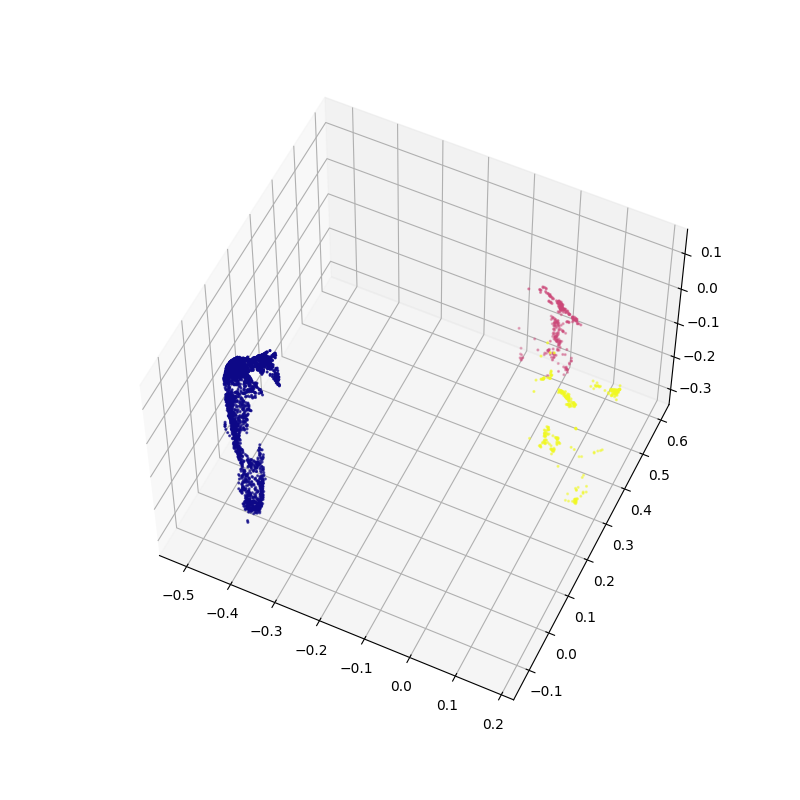

<IPython.core.display.Javascript object>


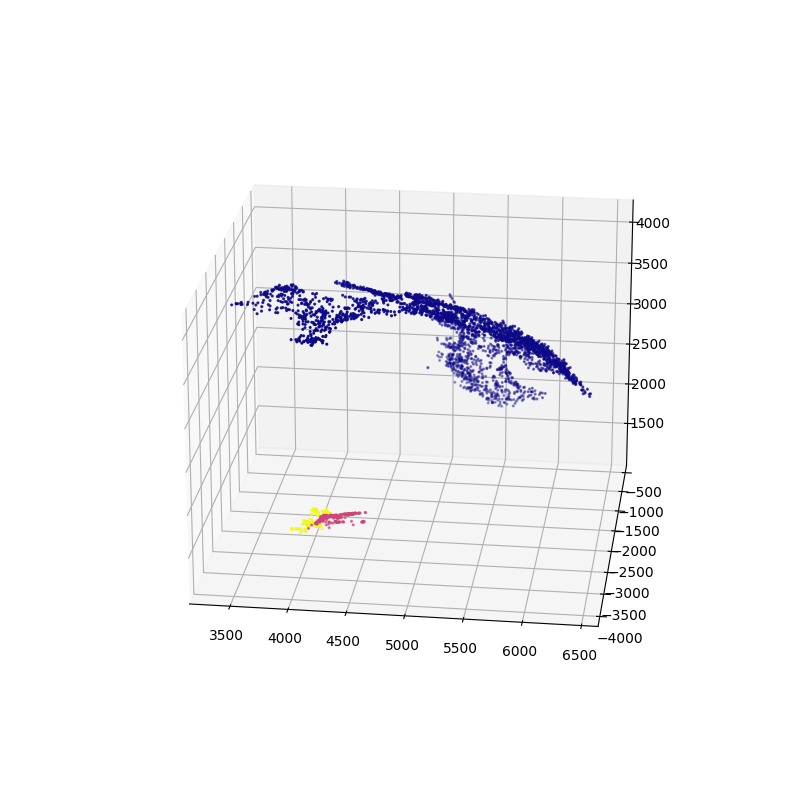

In [39]:
virgo_clustering = VirgoClustering(vc_3, min_samples=100)
virgo_clustering.predict()
vc_3.remove_small_groups(remove_thresh=200)
vc_3.sort_labels()
labels_removed = vc_3.get_labels(return_counts=True)
print(labels_removed)

vc_3.plot_cluster(n_step=1, plot_kernel_space=True)
vc_3.plot_cluster(n_step=1)

In [19]:
# virgo_clustering = VirgoClustering(vc_3, n_clusters=8, clustering_type="agglo")
# virgo_clustering.predict()
# labels_removed = vc_3.get_labels(return_counts=True)
# print(labels_removed)

# vc_3.plot_cluster(n_step=1, plot_kernel_space=True)
# vc_3.plot_cluster(n_step=1)

In [20]:
# virgo_clustering = VirgoClustering(virgo_cluster, n_clusters=10, clustering_type="spectral")
# virgo_clustering.predict()
# labels_removed = virgo_cluster.get_labels(return_counts=True)
# print(labels_removed)

# virgo_cluster.plot_cluster(n_step=5, plot_kernel_space=True)
# virgo_cluster.plot_cluster(n_step=5)

0.035 10
(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9]), array([6809, 6553, 2930, 2798, 2045, 1221,  705,  312,  292,  239,  211]))


<IPython.core.display.Javascript object>


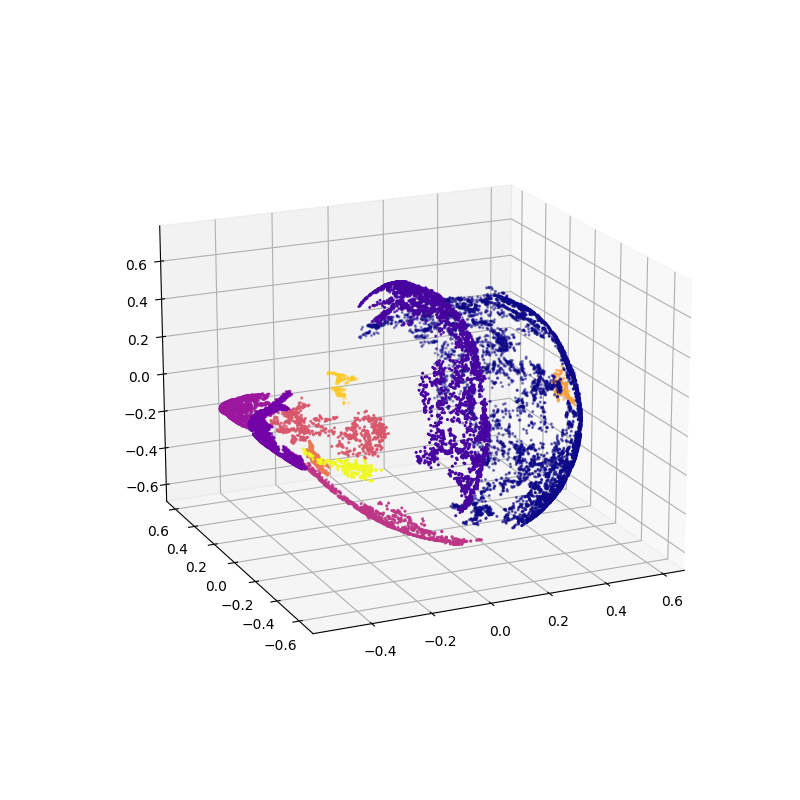

<IPython.core.display.Javascript object>


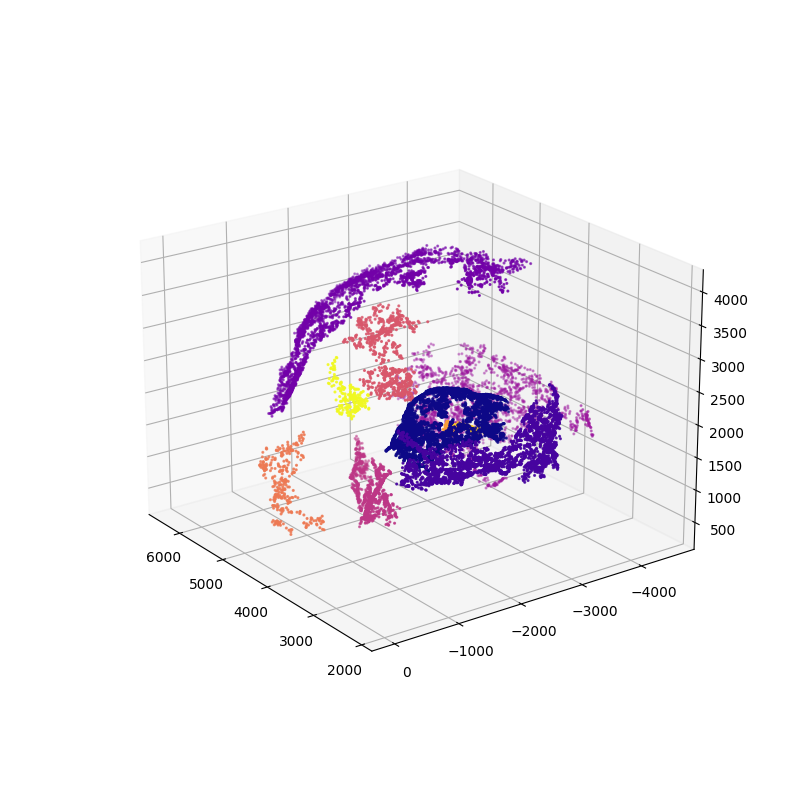

In [36]:
virgo_clustering = VirgoClustering(vc_3, min_samples=10, clustering_type="dbscan")
virgo_clustering.predict()
vc_3.remove_small_groups(remove_thresh=200)
vc_3.sort_labels()
labels_removed = vc_3.get_labels(return_counts=True)
print(labels_removed)

vc_3.plot_cluster(n_step=1, plot_kernel_space=True)
vc_3.plot_cluster(n_step=1)

In [22]:
# import matplotlib.pyplot as plt

In [23]:
# elbos = []
# bics = []
# for i in range(2, 45, 3):
#     virgo_mixture = VirgoMixture(virgo_cluster, n_comp=i, mixture_type="gaussian")
#     elbo = virgo_mixture.fit()
#     elbos.append(elbo)
#     bic = virgo_mixture.model.bic(virgo_cluster.scaled_data)
#     bics.append(bic)
#     print(i, elbo, bic)

# print(elbos)
# print(bics)

In [24]:
# plt.plot(elbos)
# plt.show()   

In [25]:
# plt.plot(bics)
# plt.show()  